### To start:
- Place the cursor within the cell below.
- Change `2018_01` (YYYY_MM) to run a different year and month. (Only 2017-2018 data are currently avialable)
- Press "Run" button above to run the cell. 
![run button](./images/run_button.png)   

### Once the "Figure 1" bar is displayed, you can now use the graphical interface. 
![interaction_bar](./images/interaction_bar.png)
- Select another longitude by moving the "Long" slider or pressing left- (<) and right-arrow (>) associated with it.  
- Select time and date within YYYY_MM by moving the "Date" slider or pressing left- (<) and right-arrow (>) associated with it.
- Press "Jet Stream ON/OFF" button to toggle display of jet stream markers.
- Press "Limitation ON/OFF" button to enable/disable further limitation of jet stream algorithm.
- See cell below graph for steps used in the jet stream characterization.

<IPython.core.display.Javascript object>


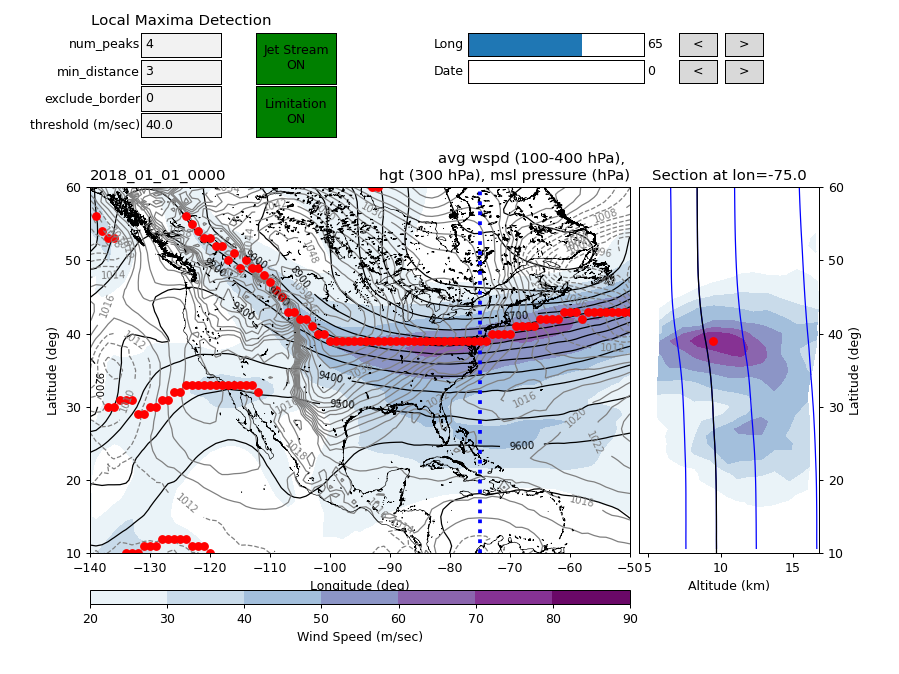

Reading ERA5 data from: http://whewell.marine.unc.edu/dods/era5
['longitude', 'latitude', 'level', 'time', 'z']
['longitude', 'latitude', 'level', 'time', 'u']
['longitude', 'latitude', 'level', 'time', 'v']
['longitude', 'latitude', 'time', 'msl']


In [1]:
%matplotlib notebook
%run jsviz.py 2018_01

### Jet Stream Characterization

- Find maximum wind speeds in upper troposhere
- Apply further limitations when mulitple peaks are found

#### Choosing Maximum Windspeeds

One main goal is to identify the location (longitude, latitude, and altitude) of peak winds with time to identify the variable path of the jet streams. By using an image processing method called "Local Maxima Detection," the coordinates of maxima windspeeds in 2D (latitude and altitude) can be determined for each longitude and each time step.  This method efficiently automates the process to analyze decades of atmospheric reanalysis data for jet stream characteristics. 

We use the Python function `peak_local_max` available from the [*scikit-image*](https://scikit-image.org/) open-source library to implement the "Local Maxima Detection" method.

A maximum filter is used for finding local maxima. This operation dilates the original image and merges neighboring local maxima closer than the size of the dilation. Locations where the original image is equal to the dilated image are returned as local maxima. This [example](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_peak_local_max.html) of the `peak_local_max` function demostrates how it works.

- Change parameters under "Local Maxima Detection" to change aspects of how peaks are identified by `peak_local_max`.

| Syntax | Default | Description |
|-----------:|:--------:|:-----------|
| `num_peaks` | `   4   ` | Maximum number of peaks to pick in the image |
| `min_distance` | `  3    ` | Dilation factor or minimum number of pixels separating peaks. |
| `exclude_border` | `   0   ` | Distance from the border to exclude finding peaks.  If 0, then peak may be included if on the border |
| `threshold` | `   40  ` | Minimum intensity of peaks (m/s) |

#### Further Peak Limitations

The automated process sometimes finds additional peaks that are not representative of the true jet core. Tuning the above parameters can help, but further limitations are required.  There are two additional criteria:

1. When there is more than one peak above the `threshold` (40 m/s default) contained within the same 30 m/s contour, the maximum peak is retained.  
2. Also, only positive zonal winds (eastward) are retained.

We use the `findContours()` and `pointPolygonTest()` functions from the [Open Source Computer Vision (OpenCV) Python Library](https://docs.opencv.org/master/) to test if multiple points fall within the same contour.  

